In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/BlackFriday.csv')

In [3]:
print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [4]:
df.shape

(537577, 12)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


In [6]:
print(df.describe())

            User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000  

The first thing we can notice when we print our data is that there are 537577 transactions in total. We can also see that of all of them there are only 370591 transactions with 2 categories and 164278 with 3 categories.

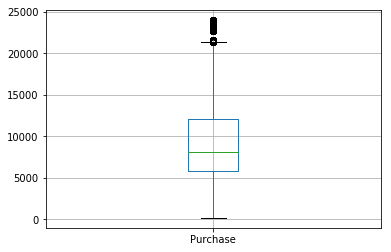

In [7]:
# detect outliers
df.boxplot(column='Purchase', return_type='axes')

In [155]:
pd.pivot_table(df,index=["Gender"],values=["Purchase"],aggfunc='mean')

,Purchase
Gender,
F,8809.761349
M,9504.771713


In [156]:
pd.pivot_table(df,index=["Gender"],values=["Purchase"],aggfunc=np.sum)

,Purchase
Gender,
F,1164624021
M,3853044357


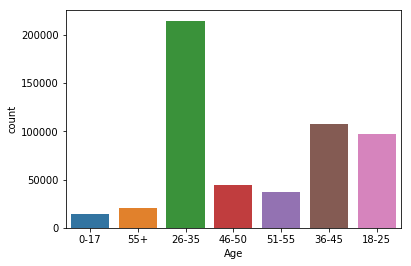

In [20]:
sns.countplot(df['Age'])

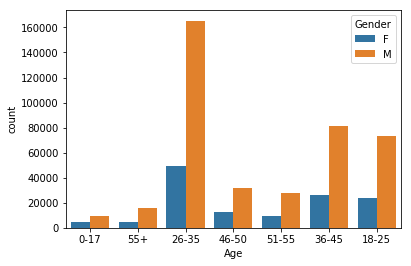

In [21]:
sns.countplot(df['Age'],hue=df['Gender'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


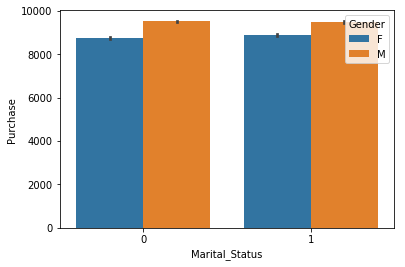

In [25]:
sns.barplot(x='Marital_Status', y='Purchase', hue='Gender', data=df)

In [158]:
df.pivot_table('Purchase', 'Gender', 'Marital_Status', aggfunc=np.sum)

Marital_Status,0,1
Gender,,
F,673815717,490808304
M,2292473783,1560570574


In [157]:
df.pivot_table('Purchase', 'Gender', 'Marital_Status', aggfunc='mean')

Marital_Status,0,1
Gender,,
F,8753.809299,8887.751553
M,9518.540223,9484.617891


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


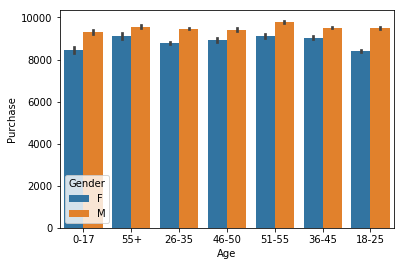

In [12]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

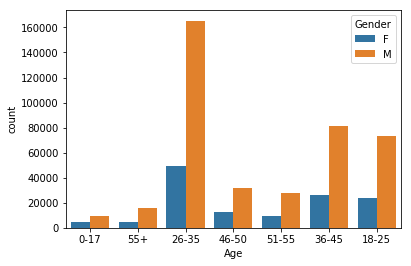

In [10]:
sns.countplot(df['Age'], hue=df['Gender'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


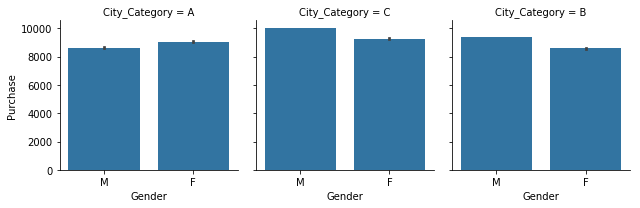

In [28]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


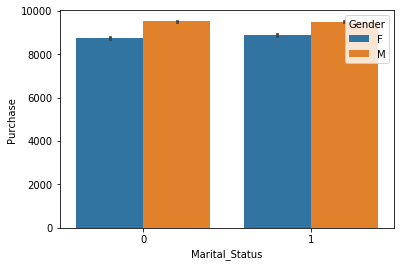

In [18]:
sns.barplot(x='Marital_Status', y='Purchase', hue='Gender', data=df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


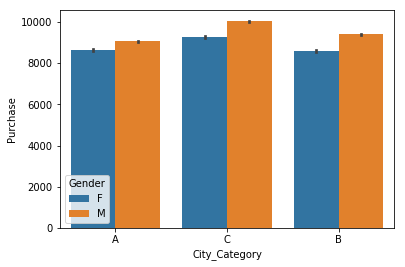

In [19]:
sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=df)

In [71]:
df['User_ID'].nunique()

5891

In [69]:
df['User_ID'].count()

537577

In [77]:
gender_marital_status_grouped = df.groupby(['Gender','Marital_Status']).size()
print(gender_marital_status_grouped)

Gender  Marital_Status
F       0                  76974
        1                  55223
M       0                 240843
        1                 164537
dtype: int64


In [100]:
df.pivot_table( 'Purchase', ['Age'], aggfunc= np.sum )

,Purchase
Age,
0-17,132659006
18-25,901669280
26-35,1999749106
36-45,1010649565
46-50,413418223
51-55,361908356
55+,197614842


In [104]:
age_marital_status_grouped = df.groupby(['Age']).size()
print(age_marital_status_grouped)

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64


In [112]:
curi=df.copy()
curi = curi.groupby('Age')['User_ID'].nunique()
print(curi)

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64


In [115]:
brian=df.copy()
brian = brian.groupby('City_Category')['User_ID'].nunique()
print(brian)

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64


In [124]:
luca=df.copy()
luca = luca.groupby('City_Category')['User_ID'].agg('count')  
print(luca)

City_Category
A    144638
B    226493
C    166446
Name: User_ID, dtype: int64


In [125]:
jack=df.copy()
jack = jack.groupby('City_Category')['Purchase'].agg('sum')  
print(jack)

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64


In [130]:
cc=df.copy()
cc = cc.groupby(['City_Category' ,'Stay_In_Current_City_Years'])['User_ID'].nunique() 
print(cc)

City_Category  Stay_In_Current_City_Years
A              0                              147
               1                              370
               2                              183
               3                              180
               4+                             165
B              0                              211
               1                              608
               2                              342
               3                              295
               4+                             251
C              0                              414
               1                             1108
               2                              620
               3                              504
               4+                             493
Name: User_ID, dtype: int64
